# DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
        * target: 사용자가 다음 달에도 구독을 계속할지 (1) 또는 취소할지 (0)를 나타냄

In [99]:
import pandas as pd

# 데이터셋 경로
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 데이터의 처음 몇 개 행을 확인
print(df.head())

    user_id  subscription_duration  recent_login_time  average_login_time  \
0  b919c29d                     13                 14           14.946163   
1  a0a60abb                     16                 18           18.453224   
2  b9f171ae                     22                  1           16.195228   
3  5dc0ba8b                      1                 19           17.628656   
4  65c83654                      4                  5           21.390656   

   average_time_per_learning_session  monthly_active_learning_days  \
0                           8.427187                            18   
1                          72.646087                            16   
2                          21.774492                            13   
3                          42.659066                            19   
4                          30.744287                            19   

   total_completed_courses  recent_learning_achievement  \
0                       16                    68.360455  

In [100]:
#target에 따른 최근 학습 성취도에 대한 평균

# target 값에 따른 recent_learning_achievement의 평균 계산
mean_achievement_target_0 = df[df['target'] == 0]['recent_learning_achievement'].mean()
mean_achievement_target_1 = df[df['target'] == 1]['recent_learning_achievement'].mean()

print(f"target이 0일 때 recent_learning_achievement의 평균: {mean_achievement_target_0:.2f}")
print(f"target이 1일 때 recent_learning_achievement의 평균: {mean_achievement_target_1:.2f}")


target이 0일 때 recent_learning_achievement의 평균: 75.00
target이 1일 때 recent_learning_achievement의 평균: 75.05


In [102]:
#target에 따른 지난 3개월 결제 패턴

import pandas as pd

# CSV 파일 불러오기 (이미 불러왔다고 가정)
# df = pd.read_csv('data.csv')

# target이 0일 때와 1일 때의 payment_pattern 분포도 출력
print("target이 0일 때 payment_pattern 분포:")
print(df[df['target'] == 0]['payment_pattern'].value_counts())
print("\n")

print("target이 1일 때 payment_pattern 분포:")
print(df[df['target'] == 1]['payment_pattern'].value_counts())


target이 0일 때 payment_pattern 분포:
payment_pattern
1    502
7    489
5    488
0    468
3    467
6    467
4    461
2    459
Name: count, dtype: int64


target이 1일 때 payment_pattern 분포:
payment_pattern
0    807
6    801
7    795
1    783
3    763
4    753
5    750
2    747
Name: count, dtype: int64


In [105]:
# 대체를 위한 딕셔너리 생성
replacement_dict = {
    7: '3개월 모두 결제함',
    6: '첫 2개월은 결제했으나 마지막 달에는 결제하지 않음',
    5: '첫 달과 마지막 달에 결제함',
    4: '첫 달에만 결제함',
    3: '마지막 2개월에 결제함',
    2: '가운데 달에만 결제함',
    1: '마지막 달에만 결제함',
    0: '3개월 동안 결제하지 않음'
}

# payment_pattern 값의 순차적 나열을 위한 리스트
pattern_sequence = sorted(df['payment_pattern'].unique())

# target이 0일 때의 payment_pattern 분포 출력
print("target이 0일 때 payment_pattern 분포:")
for pattern in pattern_sequence:
    count = df[(df['target'] == 0) & (df['payment_pattern'] == pattern)].shape[0]
    print(f"{replacement_dict[pattern]}: {count}")

print("\n")

# target이 1일 때의 payment_pattern 분포 출력
print("target이 1일 때 payment_pattern 분포:")
for pattern in pattern_sequence:
    count = df[(df['target'] == 1) & (df['payment_pattern'] == pattern)].shape[0]
    print(f"{replacement_dict[pattern]}: {count}")

target이 0일 때 payment_pattern 분포:
3개월 동안 결제하지 않음: 468
마지막 달에만 결제함: 502
가운데 달에만 결제함: 459
마지막 2개월에 결제함: 467
첫 달에만 결제함: 461
첫 달과 마지막 달에 결제함: 488
첫 2개월은 결제했으나 마지막 달에는 결제하지 않음: 467
3개월 모두 결제함: 489


target이 1일 때 payment_pattern 분포:
3개월 동안 결제하지 않음: 807
마지막 달에만 결제함: 783
가운데 달에만 결제함: 747
마지막 2개월에 결제함: 763
첫 달에만 결제함: 753
첫 달과 마지막 달에 결제함: 750
첫 2개월은 결제했으나 마지막 달에는 결제하지 않음: 801
3개월 모두 결제함: 795


In [113]:
# target 값이 0일 때의 subscription_duration의 평균값
mean_duration_target_0 = df[df['target'] == 0]['subscription_duration'].mean()

# target 값이 1일 때의 subscription_duration의 평균값
mean_duration_target_1 = df[df['target'] == 1]['subscription_duration'].mean()

print(f"target이 0일 때의 subscription_duration 평균값: {mean_duration_target_0:.2f}")
print(f"target이 1일 때의 subscription_duration 평균값: {mean_duration_target_1:.2f}")


target이 0일 때의 subscription_duration 평균값: 11.95
target이 1일 때의 subscription_duration 평균값: 11.86


In [114]:
# target 값이 0일 때의 subscription_type 분포 출력
print("target이 0일 때 subscription_type 분포:")
print(df[df['target'] == 0]['subscription_type'].value_counts())

print("\n")

# target 값이 1일 때의 subscription_type 분포 출력
print("target이 1일 때 subscription_type 분포:")
print(df[df['target'] == 1]['subscription_type'].value_counts())

target이 0일 때 subscription_type 분포:
subscription_type
Basic      2296
Premium    1505
Name: count, dtype: int64


target이 1일 때 subscription_type 분포:
subscription_type
Basic      3683
Premium    2516
Name: count, dtype: int64


In [115]:
# 전체 데이터의 수
total_count = len(df)

# target 값이 0일 때의 subscription_type 비율
print("target이 0일 때 subscription_type 비율:")
for stype, count in df[df['target'] == 0]['subscription_type'].value_counts().items():
    percentage = (count / total_count) * 100
    print(f"{stype}: {percentage:.2f}%")

print("\n")

# target 값이 1일 때의 subscription_type 비율
print("target이 1일 때 subscription_type 비율:")
for stype, count in df[df['target'] == 1]['subscription_type'].value_counts().items():
    percentage = (count / total_count) * 100
    print(f"{stype}: {percentage:.2f}%")


target이 0일 때 subscription_type 비율:
Basic: 22.96%
Premium: 15.05%


target이 1일 때 subscription_type 비율:
Basic: 36.83%
Premium: 25.16%


In [117]:
pip install pandas numpy seaborn matplotlib

The variable most correlated with 'target' is 'average_time_per_learning_session' with a correlation value of 0.12


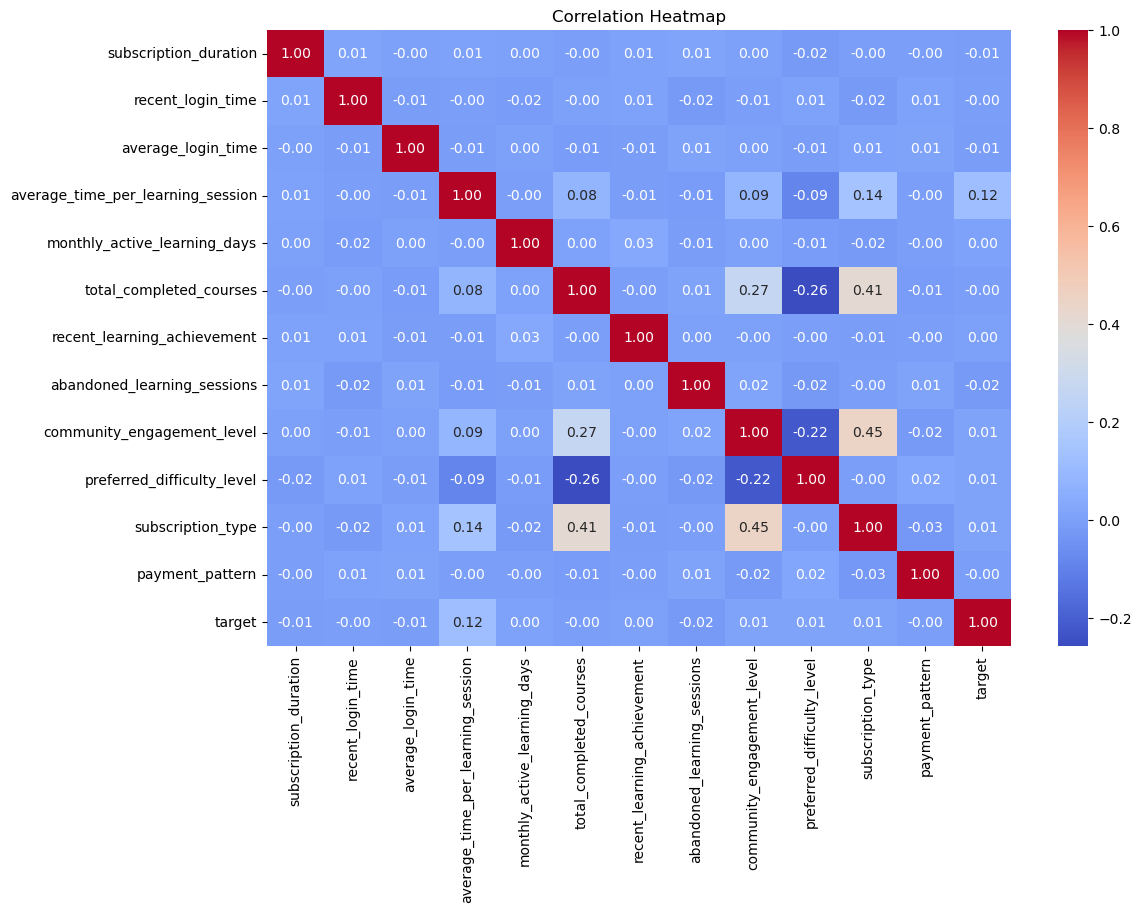

In [123]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
df = pd.read_csv(file_path)

# 2. 데이터 전처리
# preferred_difficulty_level 변환
difficulty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['preferred_difficulty_level'] = df['preferred_difficulty_level'].map(difficulty_mapping)

# subscription_type 변환
subscription_mapping = {'Basic': 0, 'Premium': 1}
df['subscription_type'] = df['subscription_type'].map(subscription_mapping)

# customer_inquiry_history와 user_id 삭제
df.drop(['customer_inquiry_history', 'user_id'], axis=1, inplace=True)

# 상관관계 계산
correlation_matrix = df.corr()

# target과의 상관관계가 높은 변수 찾기
correlation_with_target = correlation_matrix['target'].drop('target')  # target 자기 자신은 제외

# 상관관계가 가장 높은 변수의 이름 출력
most_correlated_variable = correlation_with_target.idxmax()
correlation_value = correlation_with_target.max()

print(f"The variable most correlated with 'target' is '{most_correlated_variable}' with a correlation value of {correlation_value:.2f}")

# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [119]:
import pandas as pd

# 데이터를 불러오는 과정 (위에서 이미 로드한 df를 사용하겠습니다.)
# file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
# df = pd.read_csv(file_path)

# target이 0인 그룹의 average_time_per_learning_session의 평균
target_0_mean = df[df['target'] == 0]['average_time_per_learning_session'].mean()

# target이 1인 그룹의 average_time_per_learning_session의 평균
target_1_mean = df[df['target'] == 1]['average_time_per_learning_session'].mean()

print(f"Target 0의 average_time_per_learning_session 평균: {target_0_mean:.2f} 분")
print(f"Target 1의 average_time_per_learning_session 평균: {target_1_mean:.2f} 분")


Target 0의 average_time_per_learning_session 평균: 46.46 분
Target 1의 average_time_per_learning_session 평균: 60.11 분


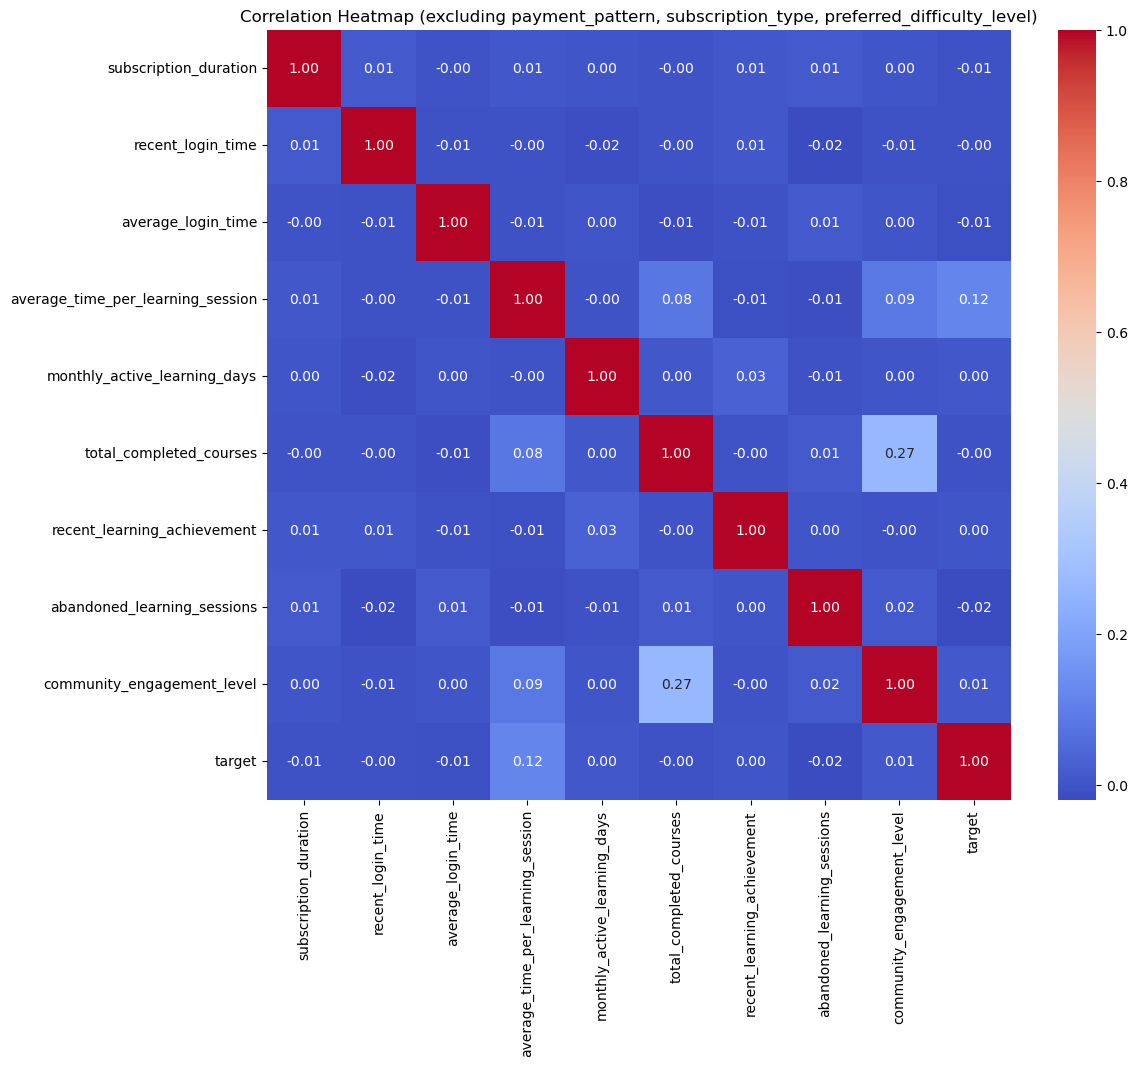

The variable most correlated with 'target' is 'average_time_per_learning_session' with a correlation value of 0.12

Cumulative values for target 0:
subscription_duration                 45437.000000
recent_login_time                     57235.000000
average_login_time                    57116.721483
average_time_per_learning_session    176583.005672
monthly_active_learning_days          47521.000000
total_completed_courses               46548.000000
recent_learning_achievement          285076.179726
abandoned_learning_sessions           11736.000000
community_engagement_level            14712.000000
preferred_difficulty_level             2615.000000
subscription_type                      1505.000000
payment_pattern                       13330.000000
dtype: float64

Cumulative values for target 1:
subscription_duration                 73537.000000
recent_login_time                     92897.000000
average_login_time                    92824.043024
average_time_per_learning_session    37

In [125]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
df = pd.read_csv(file_path)

# 2. 데이터 전처리
# preferred_difficulty_level 변환
difficulty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['preferred_difficulty_level'] = df['preferred_difficulty_level'].map(difficulty_mapping)

# subscription_type 변환
subscription_mapping = {'Basic': 0, 'Premium': 1}
df['subscription_type'] = df['subscription_type'].map(subscription_mapping)

# user_id와 customer_inquiry_history 삭제
df.drop(['user_id', 'customer_inquiry_history'], axis=1, inplace=True)

# payment_pattern, subscription_type, preferred_difficulty_level은 상관관계 및 히트맵에서 제외
df_for_correlation = df.drop(['payment_pattern', 'subscription_type', 'preferred_difficulty_level'], axis=1)

# target 0과 1에 대한 누적 수치만 뽑기
target_0 = df[df['target'] == 0].drop(['target'], axis=1).sum()
target_1 = df[df['target'] == 1].drop(['target'], axis=1).sum()

# 상관관계 히트맵 생성
plt.figure(figsize=(12, 10))
sns.heatmap(df_for_correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (excluding payment_pattern, subscription_type, preferred_difficulty_level)")
plt.show()

# 가장 상관관계가 큰 경우의 수 찾기
correlation_matrix = df_for_correlation.corr()
correlation_with_target = correlation_matrix['target'].drop('target')  # target 자기 자신은 제외

most_correlated_variable = correlation_with_target.idxmax()
correlation_value = correlation_with_target.max()

print(f"The variable most correlated with 'target' is '{most_correlated_variable}' with a correlation value of {correlation_value:.2f}")

# 결과 출력
print("\nCumulative values for target 0:")
print(target_0)

print("\nCumulative values for target 1:")
print(target_1)


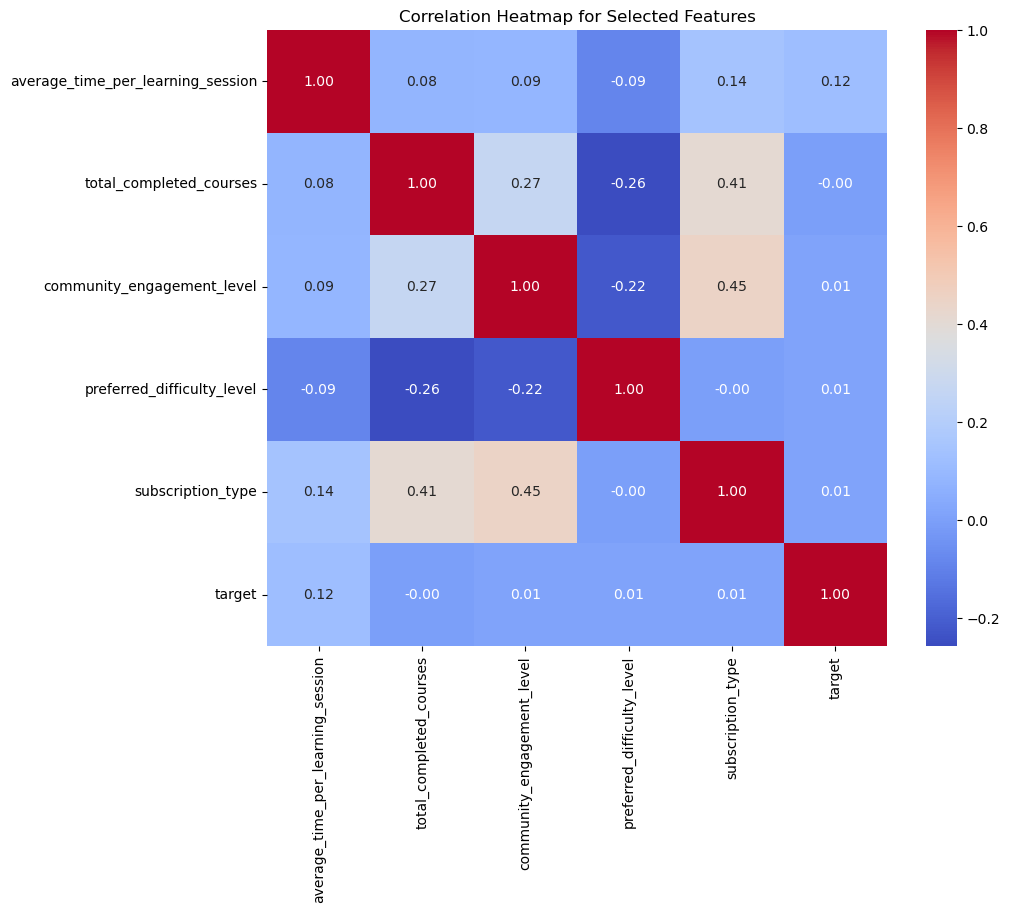

In [129]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
df = pd.read_csv(file_path)

# 2. 필요한 열만 선택
selected_columns = [
    'average_time_per_learning_session',
    'total_completed_courses',
    'community_engagement_level',
    'preferred_difficulty_level',
    'subscription_type',
    'target'
]
df_selected = df[selected_columns].copy()  # 복사본 생성

# 3. preferred_difficulty_level, subscription_type을 숫자로 변환
difficulty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df_selected['preferred_difficulty_level'] = df_selected['preferred_difficulty_level'].map(difficulty_mapping)

subscription_mapping = {'Basic': 0, 'Premium': 1}
df_selected['subscription_type'] = df_selected['subscription_type'].map(subscription_mapping)

# 4. 상관관계 히트맵 생성
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Selected Features")
plt.show()


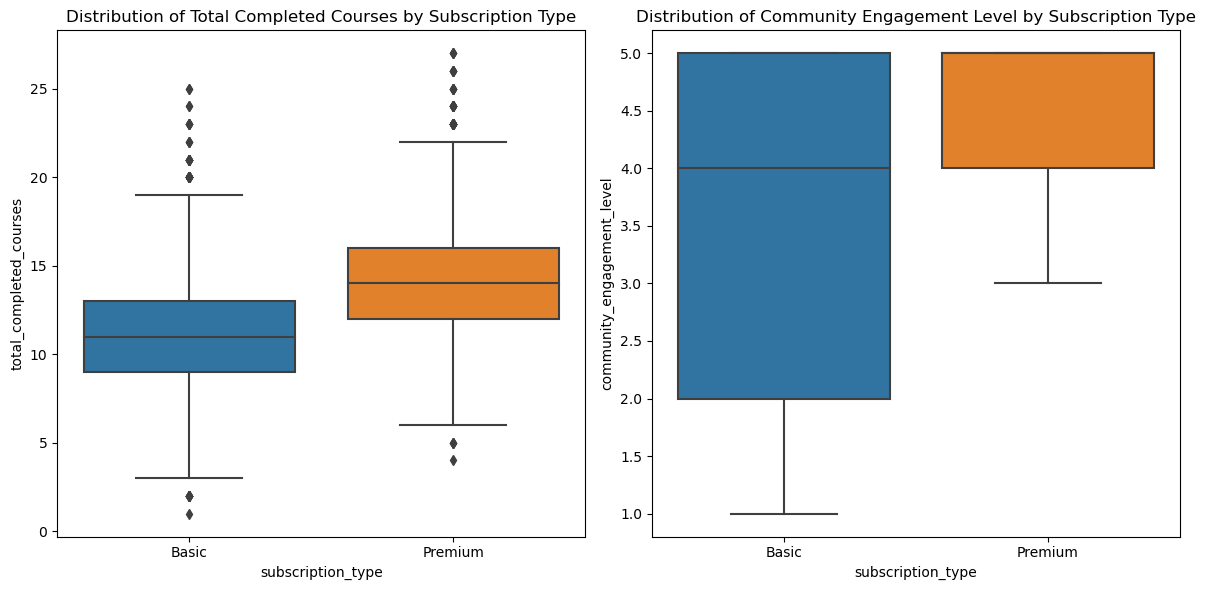

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
df = pd.read_csv(file_path)

# subscription_type에 따른 total_completed_courses 및 community_engagement_level 분포 시각화
plt.figure(figsize=(12, 6))

# total_completed_courses에 대한 boxplot
plt.subplot(1, 2, 1)  # 1행 2열 중 첫 번째
sns.boxplot(x='subscription_type', y='total_completed_courses', data=df)
plt.title('Distribution of Total Completed Courses by Subscription Type')

# community_engagement_level에 대한 boxplot
plt.subplot(1, 2, 2)  # 1행 2열 중 두 번째
sns.boxplot(x='subscription_type', y='community_engagement_level', data=df)
plt.title('Distribution of Community Engagement Level by Subscription Type')

plt.tight_layout()
plt.show()


In [132]:
import pandas as pd

# 데이터 불러오기
file_path = r'C:\Users\Thinkpad\OneDrive\바탕 화면\[ESTsoft] AI 서비스 기획자 양성과정 1기\오전 교안\004_데이터분석\data\mini.csv'
df = pd.read_csv(file_path)

# preferred_difficulty_level에 따른 total_completed_courses와 community_engagement_level의 중앙값 계산
result = df.groupby('preferred_difficulty_level').agg({
    'total_completed_courses': 'median',
    'community_engagement_level': 'median'
}).reset_index()
ss
print(result)


  preferred_difficulty_level  total_completed_courses  \
0                       High                     11.0   
1                        Low                     13.0   
2                     Medium                     11.0   

   community_engagement_level  
0                         4.0  
1                         5.0  
2                         4.0  


In [ ]:
#완료한 총 코스 수(total_completed_courses)와 커뮤니티 참여도(community_engagement_level)은
구독의 타입(subscription_type)과 상관관계가 가장 높음

#구독의 타입(subscription_type)은 이전 두개의 데이터 이외에 각 학습 세션에 소요된 평균 시간(average_time_per_learning_sessio)과 관계가 있어 보임

#세션에 소요된 평균 시간(average_time_per_learning_sessio)은 target과 가장 관계가 높은 수치를 보여줌

#그렇다면 왜 완료한 총 코스 수(total_completed_courses)와 커뮤니티 참여도(community_engagement_level), 구독의 타입(subscription_type)은 target과 직접적인 관계가 없을까?

#구독의 타입(subscription_type)이 Premium인 경우 상당히 높은 커뮤니티 참여도(community_engagement_level) 수치를 보여주고 있다.

#선호하는 난이도(preferred_difficulty_level)는 커뮤니티 참여도(community_engagement_level), 완료한 총 코스 수(total_completed_courses)와 반비례 수치를 보인다.

In [135]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv(file_path)

# preferred_difficulty_level 값 변환
difficulty_mapping = {'Low': 0, 'Medium': 1, 'High': 2}
df['preferred_difficulty_level'] = df['preferred_difficulty_level'].map(difficulty_mapping)

# preferred_difficulty_level의 각 값에 대한 target의 0과 1의 합계 계산
result = pd.crosstab(df['preferred_difficulty_level'], df['target'])

print(result)


target                         0     1
preferred_difficulty_level            
0                           1945  3047
1                           1097  1911
2                            759  1241


In [ ]:
63%
57%
61%